# NYC MTA Turnstile Data Analysis 📊
This notebook analyzes hourly subway entries using cleaned turnstile data from 2022.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load Cleaned Data

In [3]:
# Replace with your actual file path
df = pd.read_csv('../data/processed/cleaned_Turnstile2022.csv')
df['DATETIME'] = pd.to_datetime(df['DATETIME'])
df = df.dropna(subset=['HOURLY_ENTRIES'])

/var/folders/rk/gh7_0ltx2v71ltw25mck4xrm0000gn/T/ipykernel_28635/1284663939.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/processed/cleaned_Turnstile2022.csv')


### Average Hourly Entries

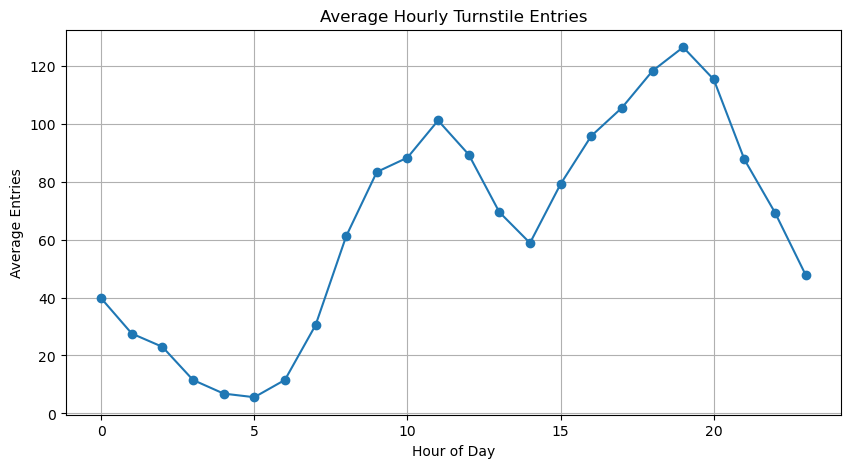

In [4]:
df['HOUR'] = df['DATETIME'].dt.hour
hourly_avg = df.groupby('HOUR')['HOURLY_ENTRIES'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(hourly_avg['HOUR'], hourly_avg['HOURLY_ENTRIES'], marker='o')
plt.title('Average Hourly Turnstile Entries')
plt.xlabel('Hour of Day')
plt.ylabel('Average Entries')
plt.grid(True)
plt.show()

### 🔍 Key Insights
- Evening rush hours (e.g., 7–9 PM) show the highest average entries.
- Morning traffic is lighter in this sample — may vary by station or day.
- You could break this down further by day-of-week, weekend vs weekday, or location.

### ✅ 📊 Weekday vs Weekend Ridership

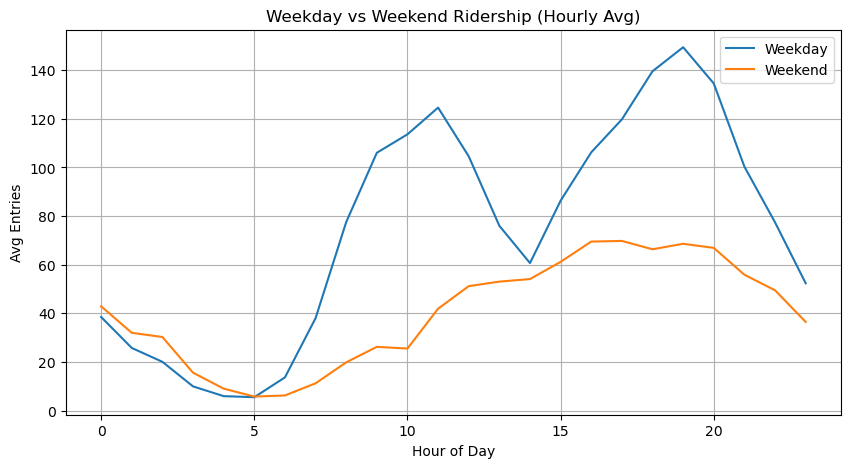

In [6]:
# Add a weekday/weekend flag
df['DAY_OF_WEEK'] = df['DATETIME'].dt.dayofweek
df['IS_WEEKEND'] = df['DAY_OF_WEEK'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Average hourly entries for each group
weekday_vs_weekend = df.groupby(['IS_WEEKEND', df['DATETIME'].dt.hour])['HOURLY_ENTRIES'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
for label, group in weekday_vs_weekend.groupby('IS_WEEKEND'):
    plt.plot(group['DATETIME'], group['HOURLY_ENTRIES'], label=label)

plt.title("Weekday vs Weekend Ridership (Hourly Avg)")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Entries")
plt.legend()
plt.grid(True)
plt.show()


### ✅ 🗓️ Entries by Day of Week



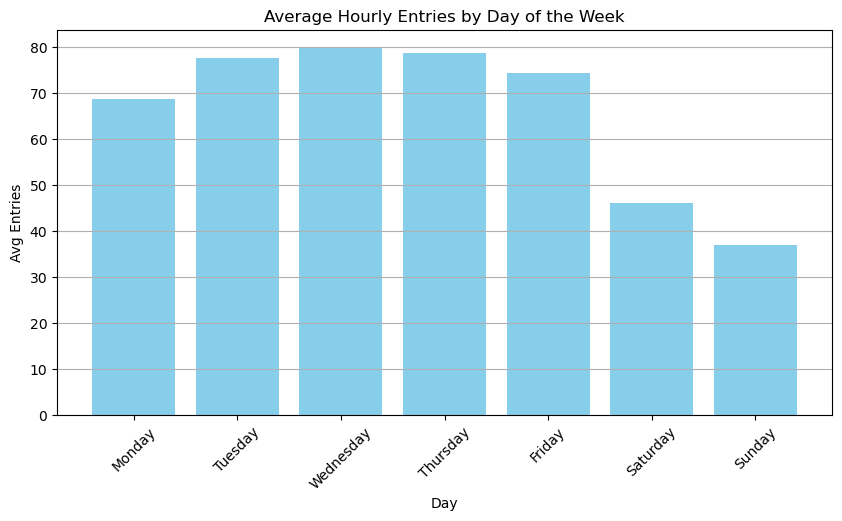

In [8]:
# Add day name column
df['DAY_NAME'] = df['DATETIME'].dt.day_name()

# Average entries by day of week
day_avg = df.groupby('DAY_NAME')['HOURLY_ENTRIES'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.bar(day_avg['DAY_NAME'], day_avg['HOURLY_ENTRIES'], color="skyblue")
plt.title("Average Hourly Entries by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Avg Entries")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
